In [149]:
import pandas as pd 
import matplotlib as plt 
import numpy as np 
import seaborn as sns 


In [150]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
train

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,0,1,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1
1,1,2,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,1
2,2,3,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,1
3,3,4,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,1
4,4,5,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2185,2185,361,1014.6,23.2,20.6,19.1,19.9,97.0,88.0,0.1,40.0,22.1,1
2186,2186,362,1012.4,17.2,17.3,16.3,15.3,91.0,88.0,0.0,50.0,35.3,1
2187,2187,363,1013.3,19.0,16.3,14.3,12.6,79.0,79.0,5.0,40.0,32.9,1
2188,2188,364,1022.3,16.4,15.2,13.8,14.7,92.0,93.0,0.1,40.0,18.0,1


<Axes: >

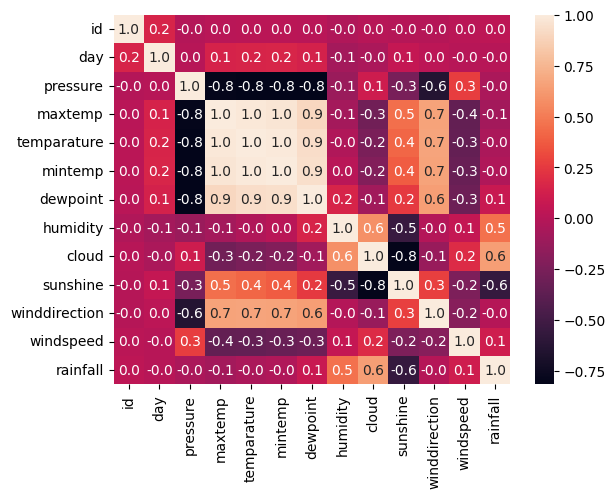

In [151]:
sns.heatmap(train.corr(), annot=True, fmt= '.1f')

In [152]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2190 entries, 0 to 2189
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             2190 non-null   int64  
 1   day            2190 non-null   int64  
 2   pressure       2190 non-null   float64
 3   maxtemp        2190 non-null   float64
 4   temparature    2190 non-null   float64
 5   mintemp        2190 non-null   float64
 6   dewpoint       2190 non-null   float64
 7   humidity       2190 non-null   float64
 8   cloud          2190 non-null   float64
 9   sunshine       2190 non-null   float64
 10  winddirection  2190 non-null   float64
 11  windspeed      2190 non-null   float64
 12  rainfall       2190 non-null   int64  
dtypes: float64(10), int64(3)
memory usage: 222.6 KB


<Axes: ylabel='cloud'>

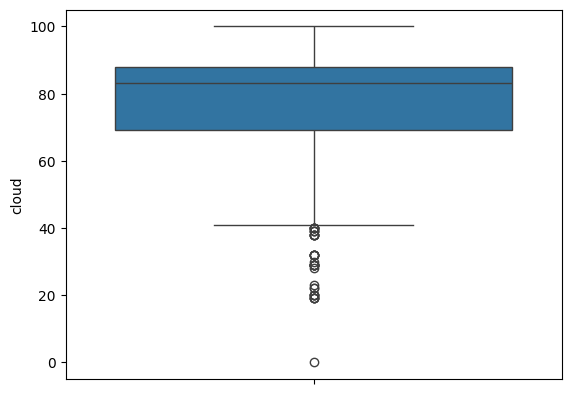

In [153]:
sns.boxplot(test['cloud'])

In [154]:
# from sklearn.preprocessing import MinMaxScaler
# sa=MinMaxScaler()
# train['cloud']=sa.fit_transform(train[['cloud']])
# test['cloud']=sa.fit_transform(test[['cloud']])

In [155]:
train['cloud']

0       88.0
1       91.0
2       47.0
3       95.0
4       45.0
        ... 
2185    88.0
2186    88.0
2187    79.0
2188    93.0
2189    88.0
Name: cloud, Length: 2190, dtype: float64

In [156]:
y=train['rainfall']
id=train['id']
id_test=test['id']
train.drop('rainfall',axis=1,inplace=True)

# train["temp_range"] = train["maxtemp"] - train["mintemp"]
# train["humidity_pressure_ratio"] = train["humidity"] / train["pressure"]
# train["wind_power"] = train["windspeed"] ** 2

# test["temp_range"] = test["maxtemp"] - test["mintemp"]
# test["humidity_pressure_ratio"] = test["humidity"] / test["pressure"]
# test["wind_power"] = test["windspeed"] ** 2


#train.drop('winddirection',axis=1,inplace=True)
#test.drop('winddirection',axis=1,inplace=True)
#train.drop('day',axis=1,inplace=True)
train.drop('id',axis=1,inplace=True)
test.drop('id',axis=1,inplace=True)
#test.drop('day',axis=1,inplace=True)
train

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
0,1,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2
1,2,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9
2,3,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1
3,4,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6
4,5,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8
...,...,...,...,...,...,...,...,...,...,...,...
2185,361,1014.6,23.2,20.6,19.1,19.9,97.0,88.0,0.1,40.0,22.1
2186,362,1012.4,17.2,17.3,16.3,15.3,91.0,88.0,0.0,50.0,35.3
2187,363,1013.3,19.0,16.3,14.3,12.6,79.0,79.0,5.0,40.0,32.9
2188,364,1022.3,16.4,15.2,13.8,14.7,92.0,93.0,0.1,40.0,18.0


<Axes: >

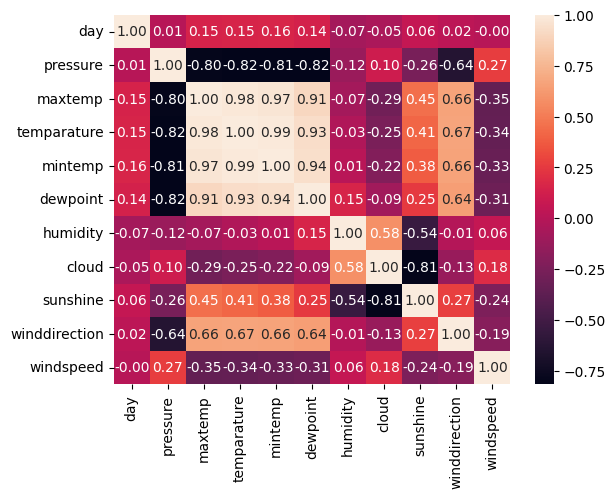

In [157]:
sns.heatmap(train.corr(), annot=True, fmt= '.2f')

In [158]:
y.value_counts()

rainfall
1    1650
0     540
Name: count, dtype: int64

In [159]:
# from imblearn.over_sampling import RandomOverSampler
# ra=RandomOverSampler()
# train_re ,y_re=ra.fit_resample(train ,y)

In [160]:
# from imblearn.over_sampling import ADASYN

# adasyn = ADASYN(sampling_strategy='auto', random_state=42)
# X_resampled, y_resampled = adasyn.fit_resample(train, y)

# print("Before ADASYN:",(y))
# print("After ADASYN:",(y_resampled))

In [161]:
from sklearn.utils import class_weight



# Compute class weights
weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(y), y=y)

# Convert to dictionary format
class_weights_dict = dict(zip(np.unique(y), weights))
print(class_weights_dict)


{0: 2.0277777777777777, 1: 0.6636363636363637}


<Axes: xlabel='rainfall', ylabel='Count'>

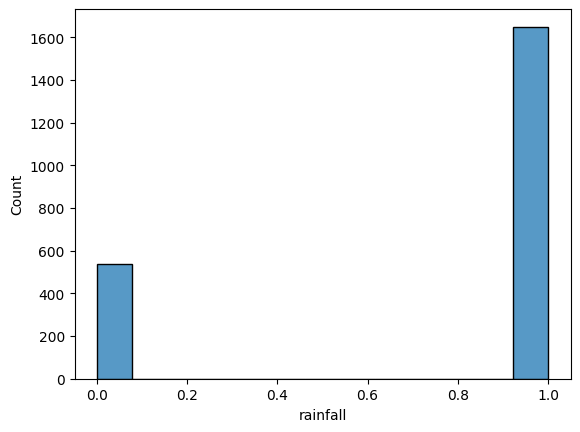

In [162]:
sns.histplot(y)

In [163]:
train_e=train[['humidity','cloud']]
test_e=test[['humidity','cloud']]

In [164]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge , Lasso , ElasticNet
from sklearn.linear_model import BayesianRidge
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from xgboost import XGBRegressor
X_train,X_valid,y_train,y_valid=train_test_split(train,y,train_size=0.8,test_size=0.2,random_state=42)
sample_weights = np.array([class_weights_dict[label] for label in y_train])
model=Ridge(random_state=42,alpha=0.1)
model1=RandomForestRegressor(n_estimators=500,random_state=42,max_depth=20,min_samples_split=5, min_samples_leaf=3)
#model2=XGBRegressor(class_weight=class_weights_dict,n_estimators=500, learning_rate=0.01, max_depth=7)
model2=Lasso(alpha=0.1,random_state=42)
#model3=DecisionTreeRegressor(random_state=0)
model3=BaggingRegressor(n_estimators=500,random_state=42,bootstrap=True)
model3=ElasticNet(alpha=0.1, l1_ratio=0.5)
model4=BayesianRidge(lambda_1=1e-3, alpha_2=1e-3)

In [165]:
# feature_selector = SelectFromModel(Ridge(alpha=0.01))
# X_train_selected = feature_selector.fit_transform(X_train, y_train)
# X_valid_selected = feature_selector.transform(X_valid)
# model4=BayesianRidge(lambda_1=1e-3, alpha_2=1e-3)

In [166]:
# model.fit(X_train_selected,y_train,sample_weight=sample_weights)
# model1.fit(X_train_selected,y_train,sample_weight=sample_weights)
# model2.fit(X_train_selected,y_train,sample_weight=sample_weights)
# model3.fit(X_train_selected,y_train,sample_weight=sample_weights)
# model4.fit(X_train_selected,y_train,sample_weight=sample_weights)

In [167]:
model.fit(X_train,y_train,sample_weight=sample_weights)
model1.fit(X_train,y_train,sample_weight=sample_weights)
model2.fit(X_train,y_train,sample_weight=sample_weights)
model3.fit(X_train,y_train,sample_weight=sample_weights)
model4.fit(X_train,y_train,sample_weight=sample_weights)

BayesianRidge(alpha_2=0.001, lambda_1=0.001)

In [168]:
from sklearn.ensemble import StackingRegressor

stacking_model = StackingRegressor(
    estimators=[
        ('bayes', BayesianRidge(lambda_1=1e-3, alpha_2=1e-3)),
        ('rf', RandomForestRegressor(n_estimators=500, max_depth=20, random_state=42)),
        ('xgb', XGBRegressor(n_estimators=500, learning_rate=0.01, max_depth=7, random_state=42))
    ],
    final_estimator=BayesianRidge()  # Meta-model
)

stacking_model.fit(X_train, y_train)

StackingRegressor(estimators=[('bayes',
                               BayesianRidge(alpha_2=0.001, lambda_1=0.001)),
                              ('rf',
                               RandomForestRegressor(max_depth=20,
                                                     n_estimators=500,
                                                     random_state=42)),
                              ('xgb',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_me...
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.01, max_bin=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=7,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=500, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=42,
                                            reg_alpha=None, reg_lambda=None, ...))],
                  final_estimator=BayesianRidge())

In [169]:
from sklearn.metrics import roc_auc_score
pred=model.predict(X_valid)
print(roc_auc_score(y_valid,pred))

0.8701825557809331


In [170]:
pred1=model1.predict(X_valid)
print(roc_auc_score(y_valid,pred1))

0.8687863860277654


In [171]:
pred2=model2.predict(X_valid)
print(roc_auc_score(y_valid,pred2))

0.8686810147256394


In [172]:
pred3=model3.predict(X_valid)
print(roc_auc_score(y_valid,pred3))

0.8700771844788072


In [173]:
pred4=model4.predict(X_valid)
print(roc_auc_score(y_valid,pred4))

0.8713679829298491


In [174]:
pred5=model.predict(X_valid)
print(roc_auc_score(y_valid,pred5))

0.8701825557809331


In [175]:
test

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
0,1,1019.5,17.5,15.8,12.7,14.9,96.0,99.0,0.0,50.0,24.3
1,2,1016.5,17.5,16.5,15.8,15.1,97.0,99.0,0.0,50.0,35.3
2,3,1023.9,11.2,10.4,9.4,8.9,86.0,96.0,0.0,40.0,16.9
3,4,1022.9,20.6,17.3,15.2,9.5,75.0,45.0,7.1,20.0,50.6
4,5,1022.2,16.1,13.8,6.4,4.3,68.0,49.0,9.2,20.0,19.4
...,...,...,...,...,...,...,...,...,...,...,...
725,361,1020.8,18.2,17.6,16.1,13.7,96.0,95.0,0.0,20.0,34.3
726,362,1011.7,23.2,18.1,16.0,16.0,78.0,80.0,1.6,40.0,25.2
727,363,1022.7,21.0,18.5,17.0,15.5,92.0,96.0,0.0,50.0,21.9
728,364,1014.4,21.0,20.0,19.7,19.8,94.0,93.0,0.0,50.0,39.5


In [176]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   day            730 non-null    int64  
 1   pressure       730 non-null    float64
 2   maxtemp        730 non-null    float64
 3   temparature    730 non-null    float64
 4   mintemp        730 non-null    float64
 5   dewpoint       730 non-null    float64
 6   humidity       730 non-null    float64
 7   cloud          730 non-null    float64
 8   sunshine       730 non-null    float64
 9   winddirection  729 non-null    float64
 10  windspeed      730 non-null    float64
dtypes: float64(10), int64(1)
memory usage: 62.9 KB


In [177]:
test['winddirection'].fillna(test['winddirection'].mean(),inplace=True)


C:\Users\lapto\AppData\Local\Temp\ipykernel_26332\3502836848.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test['winddirection'].fillna(test['winddirection'].mean(),inplace=True)


In [178]:
print(model.predict(test))

[ 1.01025268  1.03376753  0.82522531  0.10329389 -0.0879021   0.76766954
  0.84530432  0.9933184   0.90713408  0.58831622  1.0235897   0.0197612
  1.01486314  0.93670233  0.27493648 -0.3490627   0.66053839  0.56052663
 -0.05221196 -0.36366599 -0.01846774  0.19609422  0.65403457  1.0408531
  0.75563722  0.40771988 -0.23853043  1.00050138  0.82692486  0.39057079
  0.8763041   0.91149391  0.67896899  0.93992918  0.75205966  0.81906629
  0.2280192   0.78847068  0.64818787  0.82226812  0.70825363  0.7858087
  0.01998607  0.77783273  0.82592704  0.07969722  0.15569794  0.92056648
  0.18933608  0.67733356  0.91426489  1.0012119   1.03490663  0.95445749
  1.00739704  0.97976649  0.88373295  0.89440459  0.85473696  0.91753781
  0.69493803  0.93433003  0.91622681  0.69613446  0.45469299  0.17596155
 -0.00110801  0.76600169  0.81627007  0.07522262  1.03972378  0.78032805
  0.88673474  0.90597301  0.92571901  0.87305459  0.85840931  0.97817129
  0.17246749  0.91232569  0.84499647  0.96941234  0.23

In [179]:
print(model1.predict(test))

[1.         0.99865854 0.8229426  0.14056563 0.03876204 0.73169929
 0.84331897 1.         0.96667103 0.94043395 1.         0.02318781
 0.99405722 0.97628566 0.2160284  0.00313998 0.74847937 0.84160058
 0.01281481 0.00175762 0.04644033 0.03957667 0.57005529 0.9968238
 0.75652953 0.34973536 0.03334226 0.99519903 0.85908527 0.24453842
 0.98062665 0.98776658 0.77883708 0.98379097 0.86402815 0.98155653
 0.15329956 0.93649548 0.83882092 0.66708012 0.8183929  0.89800842
 0.05903787 0.92969996 0.94365529 0.05602077 0.15800071 0.99112717
 0.08428859 0.82228757 0.77801853 1.         0.99216877 0.97721203
 0.99294683 0.99849315 0.9810048  0.91634489 0.94640023 0.99672536
 0.87129658 1.         0.9846492  0.9549038  0.11748452 0.15797944
 0.01262912 0.78574324 0.92740329 0.0990413  1.         0.97554522
 0.88282018 0.98641582 0.99148785 0.95758845 0.92223136 0.9752394
 0.25579609 1.         0.91911851 0.99879121 0.18834085 0.81154001
 0.97743162 0.95899119 0.96779078 0.80839819 0.99438511 0.974528

In [180]:
print(model2.predict(test))

[ 1.01896489  1.03292007  0.87832991  0.12220062  0.03846545  0.78013023
  0.8274998   0.94291522  0.90914822  0.63416623  1.02729745  0.0701124
  1.01759589  0.89073405  0.35484925 -0.34694557  0.82274707  0.63113294
  0.05941245 -0.39365982  0.14232845  0.16705076  0.70760898  0.98104667
  0.7102705   0.39913556 -0.31282063  0.95071073  0.77718039  0.43806204
  0.84861365  0.8611246   0.69730857  0.94475772  0.68520328  0.778174
  0.20739298  0.80144754  0.67444516  0.72546387  0.69252592  0.71573391
  0.10530964  0.7867525   0.89074137  0.17395763  0.17935353  0.93478923
  0.26980898  0.67997711  0.92287978  0.99111658  1.02379598  0.946913
  0.94576511  0.96279747  0.85909165  0.8339196   0.78154244  0.87954021
  0.75819472  0.92096511  0.9307204   0.70675205  0.42777438  0.29308135
  0.0697338   0.67939393  0.71930881 -0.02809317  1.03049868  0.76435684
  0.83543842  0.86529922  0.90178805  0.78970738  0.79252131  0.92326149
  0.28768278  0.87164566  0.78951845  0.90277687  0.2287

In [181]:
print(model3.predict(test))

[ 1.00689802e+00  1.03306177e+00  8.46629818e-01  1.17900660e-01
 -2.09794959e-02  7.67008186e-01  8.28322353e-01  9.51915080e-01
  8.95012780e-01  6.08061260e-01  1.02307730e+00  2.97529019e-02
  1.01133038e+00  9.06274993e-01  2.98174989e-01 -3.59945700e-01
  7.70522122e-01  6.06569483e-01  3.37336531e-03 -3.96203782e-01
  7.61113919e-02  1.51545749e-01  6.94202221e-01  1.01162070e+00
  7.28778404e-01  3.88448768e-01 -2.83821904e-01  9.77056480e-01
  8.00821401e-01  4.12808149e-01  8.60086048e-01  8.81008473e-01
  6.91308146e-01  9.45600697e-01  7.12075665e-01  7.90210684e-01
  2.22899429e-01  7.91549259e-01  6.68831860e-01  7.50521551e-01
  7.04311661e-01  7.40554000e-01  6.65742037e-02  7.89450486e-01
  8.67442849e-01  1.24879618e-01  1.65700778e-01  9.33889601e-01
  2.25976055e-01  6.91983562e-01  9.07277394e-01  9.92651316e-01
  1.02008317e+00  9.35785958e-01  9.67630790e-01  9.65335196e-01
  8.56382881e-01  8.56591233e-01  8.16265653e-01  8.97592523e-01
  7.12609207e-01  9.28848

In [182]:
print(model4.predict(test))

[ 1.01419099  1.03956724  0.82968358  0.10665761 -0.06079832  0.75999987
  0.84512225  0.97896623  0.90126297  0.58719338  1.0284744   0.02262813
  1.01547135  0.9345424   0.27974034 -0.36162899  0.68548491  0.56252467
 -0.03623702 -0.38128759  0.00289081  0.17088447  0.65973744  1.03974651
  0.75663802  0.39690965 -0.25270737  1.00075466  0.82363887  0.39346705
  0.86682369  0.90294566  0.68666066  0.94290428  0.73704211  0.81311854
  0.22677827  0.78879031  0.65406932  0.79392897  0.70968808  0.77086777
  0.03291931  0.78364397  0.83489215  0.09376536  0.17004218  0.93073373
  0.20248722  0.6850812   0.90950775  1.00208959  1.03508362  0.950791
  1.00125603  0.97524412  0.87837514  0.87914429  0.84701281  0.91362895
  0.69766335  0.93470883  0.9249696   0.69675198  0.45770182  0.18009906
  0.00957307  0.75276032  0.78885715  0.04191966  1.04181255  0.77481263
  0.87593076  0.89828037  0.9318932   0.83059948  0.85212789  0.98286093
  0.19589933  0.91648607  0.83640836  0.97346792  0.2

In [183]:
id_test

0      2190
1      2191
2      2192
3      2193
4      2194
       ... 
725    2915
726    2916
727    2917
728    2918
729    2919
Name: id, Length: 730, dtype: int64

In [184]:
df=pd.DataFrame({"id":id_test.values,"rainfall":model4.predict(test)})

In [185]:
df.to_csv("submission.csv",index=False)